The aim of this project to analyze the bank customer's demographics and financial information which inculdes customer's age, gender. country, credit score, balance and many others to predict whether the customer will leave the bank or not.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

In [113]:
df = pd.read_csv('churn.csv')

In [114]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data prep

In [115]:
df.shape

(10000, 14)

In [116]:
df = df.drop(['RowNumber','Surname'],axis=1)

In [117]:
df.isna().mean()

CustomerId         0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [118]:
df.duplicated().mean()

0.0

In [119]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [120]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Phik

In [121]:
import phik
t = df.phik_matrix()
t['Exited'].sort_values(ascending=False)

interval columns not set, guessing: ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


Exited             1.000000
NumOfProducts      0.565084
Age                0.487524
IsActiveMember     0.241939
Balance            0.183365
Gender             0.165422
Geography          0.104511
CreditScore        0.096525
CustomerId         0.029595
Tenure             0.022895
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

# eda

exited mean

In [122]:
df['Exited'].mean()

0.2037

gender + exited

In [123]:
df.groupby('Gender')['Exited'].agg(['count','mean'])

,count,mean
Gender,,
Female,4543,0.250715
Male,5457,0.164559


age

<Axes: >

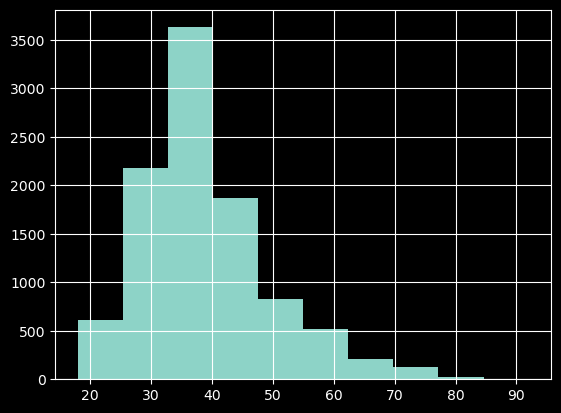

In [124]:
df['Age'].hist()

In [125]:
df['age_group'] = pd.qcut(df['Age'],5)

In [126]:
df.groupby('age_group')['Exited'].agg(['count','mean'])

,count,mean
age_group,,
"(17.999, 31.0]",2372,0.076307
"(31.0, 35.0]",1781,0.093206
"(35.0, 40.0]",2266,0.149603
"(40.0, 46.0]",1696,0.285967
"(46.0, 92.0]",1885,0.459416


Credit score

In [127]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]"
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]"
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]"
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]"
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]"


In [128]:
df['credit_group'] = pd.qcut(df['CreditScore'],5)

In [129]:
df.groupby('credit_group')['Exited'].agg(['count','mean'])

,count,mean
credit_group,,
"(349.999, 566.0]",2010,0.224876
"(566.0, 627.0]",2020,0.208416
"(627.0, 678.0]",2010,0.196517
"(678.0, 735.0]",1981,0.183241
"(735.0, 850.0]",1979,0.205154


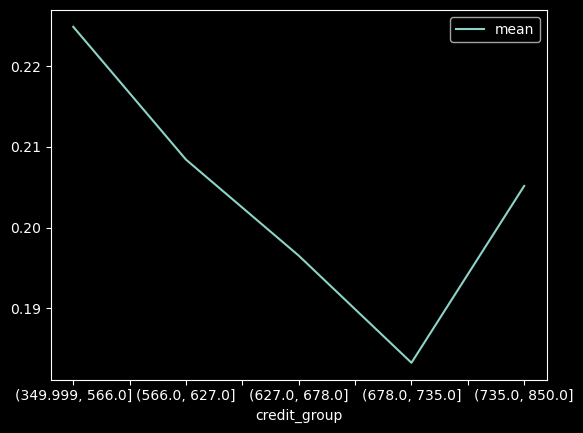

In [130]:
df.groupby('credit_group')['Exited'].agg(['mean']).plot()
plt.show()

Customer location

In [131]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,credit_group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]","(566.0, 627.0]"
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]","(566.0, 627.0]"
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]","(349.999, 566.0]"
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]","(678.0, 735.0]"
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]","(735.0, 850.0]"


In [132]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [133]:
df.groupby('Geography')['Exited'].agg(['count','mean'])

,count,mean
Geography,,
France,5014,0.161548
Germany,2509,0.324432
Spain,2477,0.166734


Tenure

In [134]:
df.groupby('Tenure')['Exited'].agg(['count','mean'])

,count,mean
Tenure,,
0,413,0.230024
1,1035,0.224155
2,1048,0.191794
3,1009,0.211100
4,989,0.205258
5,1012,0.206522
6,967,0.202689
7,1028,0.172179
8,1025,0.192195


Bank Balance

<Axes: >

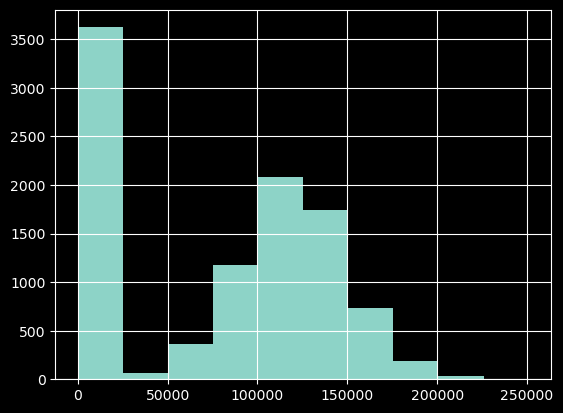

In [135]:
df['Balance'].hist()

In [136]:
df[df['Balance'] == 0.00].groupby('Balance')['Exited'].mean()

Balance
0.0    0.138236
Name: Exited, dtype: float64

In [137]:
df['balance_group'] = pd.qcut(df['Balance'],q=5,duplicates='drop')

In [138]:
df.groupby('balance_group')['Exited'].agg(['count','mean'])

,count,mean
balance_group,,
"(-0.001, 73080.908]",4000,0.1475
"(73080.908, 110138.926]",2000,0.2230
"(110138.926, 133710.358]",2000,0.2695
"(133710.358, 250898.09]",2000,0.2310


Number of products purchased

In [139]:
df.groupby('NumOfProducts')['Exited'].agg(['count','mean'])

,count,mean
NumOfProducts,,
1,5084,0.277144
2,4590,0.075817
3,266,0.827068
4,60,1.000000


Customers with/without credit card

In [140]:
df.groupby('HasCrCard')['Exited'].agg(['count','mean'])

,count,mean
HasCrCard,,
0,2945,0.208149
1,7055,0.201843


Active Members

In [141]:
df.groupby('IsActiveMember')['Exited'].agg(['count','mean'])

,count,mean
IsActiveMember,,
0,4849,0.268509
1,5151,0.142691


Estimated Salary

In [142]:
df['EstimatedSalary_group'] = pd.qcut(df['EstimatedSalary'],5)

In [143]:
df.groupby('EstimatedSalary_group')['Exited'].agg(['count','mean'])

,count,mean
EstimatedSalary_group,,
"(11.579, 41050.736]",2000,0.1995
"(41050.736, 80238.34]",2000,0.1995
"(80238.34, 119710.038]",2000,0.2020
"(119710.038, 159836.726]",2000,0.2020
"(159836.726, 199992.48]",2000,0.2155


# catboost

train test split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
train, test = train_test_split(df,test_size=0.3,random_state=42,stratify=df['Exited'])

In [146]:
test,val = train_test_split(test,test_size=0.5,random_state=42,stratify=test['Exited'])

In [147]:
len(test)+len(val)+len(train) == len(df)

True

Model

In [148]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'age_group', 'credit_group',
       'balance_group', 'EstimatedSalary_group'],
      dtype='object')

In [149]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,credit_group,balance_group,EstimatedSalary_group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(40.0, 46.0]","(566.0, 627.0]","(-0.001, 73080.908]","(80238.34, 119710.038]"
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(40.0, 46.0]","(566.0, 627.0]","(73080.908, 110138.926]","(80238.34, 119710.038]"
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(40.0, 46.0]","(349.999, 566.0]","(133710.358, 250898.09]","(80238.34, 119710.038]"
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(35.0, 40.0]","(678.0, 735.0]","(-0.001, 73080.908]","(80238.34, 119710.038]"
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(40.0, 46.0]","(735.0, 850.0]","(110138.926, 133710.358]","(41050.736, 80238.34]"


In [150]:
X = ['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
y = ['Exited']
cat_features = ['Geography','Gender']

In [151]:
from catboost import CatBoostClassifier

In [152]:
model = CatBoostClassifier(verbose=100,cat_features=cat_features,eval_metric='AUC')

In [153]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

Learning rate set to 0.051245
0:	test: 0.8366994	best: 0.8366994 (0)	total: 182ms	remaining: 3m 2s


100:	test: 0.8767213	best: 0.8775362 (82)	total: 1.54s	remaining: 13.7s
200:	test: 0.8737362	best: 0.8775362 (82)	total: 2.73s	remaining: 10.9s
300:	test: 0.8688579	best: 0.8775362 (82)	total: 3.94s	remaining: 9.14s
400:	test: 0.8653351	best: 0.8775362 (82)	total: 5.17s	remaining: 7.72s
500:	test: 0.8627588	best: 0.8775362 (82)	total: 6.54s	remaining: 6.51s
600:	test: 0.8585116	best: 0.8775362 (82)	total: 7.78s	remaining: 5.17s
700:	test: 0.8561877	best: 0.8775362 (82)	total: 9s	remaining: 3.84s
800:	test: 0.8532821	best: 0.8775362 (82)	total: 10.3s	remaining: 2.55s
900:	test: 0.8498086	best: 0.8775362 (82)	total: 11.6s	remaining: 1.27s
999:	test: 0.8486590	best: 0.8775362 (82)	total: 12.8s	remaining: 0us

bestTest = 0.8775361822
bestIteration = 82

Shrink model to first 83 iterations.


In [154]:
catboost_pred = model.predict(test[X])

In [155]:
from sklearn.metrics import roc_auc_score

In [156]:
roc_auc_score(test[y],catboost_pred)

0.7198410352415674

In [157]:
from sklearn.metrics import classification_report

In [158]:
print(classification_report(test[y],catboost_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1194
           1       0.81      0.47      0.59       306

    accuracy                           0.87      1500
   macro avg       0.84      0.72      0.76      1500
weighted avg       0.86      0.87      0.86      1500



# Data prep 2

Label encoding the variables

In [159]:
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


Normalization

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

# Train test split

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
train,test = train_test_split(df,test_size=0.3,random_state=42,stratify=df['Exited'])

In [163]:
len(train)+len(test)==len(df)

True

# Decision Tree Classifier

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [165]:
model = DecisionTreeClassifier()

In [166]:
X = ['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
y = ['Exited']

In [167]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,credit_group,balance_group,EstimatedSalary_group
0,15634602,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1,"(40.0, 46.0]","(566.0, 627.0]","(-0.001, 73080.908]","(80238.34, 119710.038]"
1,15647311,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0,"(40.0, 46.0]","(566.0, 627.0]","(73080.908, 110138.926]","(80238.34, 119710.038]"
2,15619304,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1,"(40.0, 46.0]","(349.999, 566.0]","(133710.358, 250898.09]","(80238.34, 119710.038]"
3,15701354,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0,"(35.0, 40.0]","(678.0, 735.0]","(-0.001, 73080.908]","(80238.34, 119710.038]"
4,15737888,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0,"(40.0, 46.0]","(735.0, 850.0]","(110138.926, 133710.358]","(41050.736, 80238.34]"


In [168]:
model.fit(train[X],train[y])

DecisionTreeClassifier()

In [169]:
tree_pred = model.predict(test[X])

In [170]:
roc_auc_score(test[y],tree_pred)

0.667240537131794

In [171]:
print(classification_report(test[y],tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2389
           1       0.47      0.47      0.47       611

    accuracy                           0.78      3000
   macro avg       0.67      0.67      0.67      3000
weighted avg       0.78      0.78      0.78      3000



Hyperparameters tuning

In [172]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }
grid_dtree = GridSearchCV(model, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [173]:
grid_dtree.fit(train[X], train[y])

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'random_state': [0, 42]},
             scoring='roc_auc', verbose=1)

In [174]:
grid_dtree.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'random_state': 0}

In [175]:
model = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)

In [176]:
model.fit(train[X],train[y])

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [177]:
tree_pred = model.predict(test[X])

In [178]:
roc_auc_score(test[y],tree_pred)

0.6787790329243621

In [179]:
print(classification_report(test[y],tree_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2389
           1       0.82      0.38      0.52       611

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



# Random Forest Classifier

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
model = RandomForestClassifier()

In [182]:
model.fit(train[X],train[y])

c:\Users\Timurrr\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [183]:
forest_pred = model.predict(test[X])

In [184]:
roc_auc_score(test[y],forest_pred)

0.7173179856667116

In [185]:
print(classification_report(test[y],forest_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.79      0.47      0.59       611

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



Hyperparameters tuning

In [186]:
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }
grid_rfc = GridSearchCV(model, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)
grid_rfc.fit(train[X], train[y])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\Timurrr\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'random_state': [0, 42]},
             scoring='roc_auc', verbose=1)

In [187]:
grid_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'random_state': 42}

In [188]:
model = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=42, criterion='entropy')

In [189]:
model.fit(train[X],train[y])

c:\Users\Timurrr\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=42)

In [190]:
forest_pred = model.predict(test[X])

In [191]:
roc_auc_score(test[y],forest_pred)

0.7076110569515627

In [192]:
print(classification_report(test[y],forest_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2389
           1       0.84      0.44      0.57       611

    accuracy                           0.87      3000
   macro avg       0.85      0.71      0.75      3000
weighted avg       0.86      0.87      0.85      3000



catboost win